# Probabilités


## Préambule

Ce document est une traduction "libre", approximative, et incomplète du cours de Samuel Ieong : [Probability Theory Review for Machine Learning](https://see.stanford.edu/materials/aimlcs229/cs229-prob.pdf), aggrémenté de quelques exemples Python. Les lecteurs sont fortement encouragés à se référer au document d'origine!

## Introduction


De manière générale, la théorie des probabilités est l'étude mathématique de l'incertitude. Il joue un rôle central dans l'apprentissage automatique, car la conception d'algorithmes d'apprentissage repose souvent sur le caractère probabiliste des données. Cet ensemble de notes tente de couvrir la base de la théorie des probabilités.

### L'espace de probabilité

Lorsque nous parlons de probabilité, nous nous référons souvent à la probabilité qu'un événement incertain ait lieu dans la nature. Par exemple, nous parlons de la probabilité de pluie mardi prochain. Par conséquent, afin de discuter formellement de la théorie des probabilités, nous devons d'abord clarifier ce que sont les "événements possibles" auxquels nous allons attacher des probabilités.


Formellement, un espace de probabilité est défini par le triplet $(\Omega,\mathcal{F},P)$, où:

- $\Omega$ est l'espace des résultats possibles (ou espace des résultats),
- $\mathcal{F} \subseteq 2^\Omega $ est l'espace des événements (mesurables) (ou l'espace des événements),
- $P$ est la mesure de la probabilité (ou distribution de probabilité) qui mappe un événement $E \in \mathcal{F}$ en une valeur réelle entre 0 et 1 (pensez à $P$ en tant que fonction).


Étant donné l'espace de résultat $\Omega$, il existe certaines restrictions quant au sous-ensemble de $2^\Omega$ pour qu'il puisse être considéré comme un espace d'événement $\mathcal{F}$:

- L'événement trivial $\Omega$ et l'événement vide $\emptyset$ doit être dans $\mathcal{F}$. 
- Si $\alpha,\beta \in \cal{F}$, alors $\alpha \cup \beta \in \cal{F}$.
- Si $\alpha \in \cal{F}$, alors, $\Omega \ \alpha \in \cal{F}$.

**Exemple 1**: _Supposons que nous jetions un dé (à six faces). L'espace des résultats possibles $\Omega =\{1, 2, 3, 4, 5, 6\}$. Nous pouvons décider que les événements d'intérêt sont les lancés de dés pairs et impair. Cet espace d'événement sera donné par $\cal{F} = \{\emptyset, \{1, 3, 5\}, \{2, 4, 6\}, \Omega \}$. Dans notre cas:_
- Si $E = \emptyset$, alors $P(E)=0$
- Si $E = \{1, 3, 5\}$, alors $P(E)=0.5$
- Si $E = \{2, 4, 6\}$, alors $P(E)=0.5$
- Si $E = \Omega$, alors $P(E)=1$

Etant donné un espace d'évenements $cal{F}$, la mesure de probabilité $P$ doit satisfaire les axiomes suivants:

- Pour tout $\alpha \in \mathcal{F}, P(\alpha) \ge 0$ (une probabilité ne peut pas être négative).
- $P(\Omega) = 1$.
- Pour tout $\alpha, \beta \in \mathcal{F}$ avec $\alpha \cap \beta = \emptyset$, alors $P(\alpha \cup \beta) =  P(\alpha)+P(\beta)$.

** Exemple 2**: _En revenant à notre exemple de dés, supposons que nous prenions l'espace d'événement $\cal{F} = 2^\Omega$. De plus, nous définissons une distribution de probabilité $P$ sur $\cal{F}$ telle que:_

\begin{align}
P(\{1\}) = P(\{2\}) = \dots = P(\{6\}) = \frac{1}{6}
\end{align}

_Alors cette distribution $P$ spécifie complètement la probabilité de tout événement donné
(à travers l'axiome d'additivité). Par exemple, la probabilité d'un lancer de dés pair sera:_

\begin{align}
P(\{2,4,6\}) = P(\{2\}) + P(\{4\}) + P(\{6\}) &= \frac{1}{6} + \frac{1}{6} + \frac{1}{6}\\
&= \frac{1}{2}
\end{align}

_Car tous ces événements sont disjoints. _

### Variables aléatoires

Les variables aléatoires jouent un rôle important dans la théorie des probabilités. Le fait le plus important à propos des variables aléatoires est qu'elles ne sont **pas** des variables. Elles sont en fait des fonctions qui font correspondre les résultats (dans l'espace des résultats) aux valeurs réelles. En termes de notation, nous désignons habituellement les variables aléatoires par une lettre majuscule. Voyons voir un exemple.

**Exemple 3**: _Encore une fois, considérons le processus de lancé d'un dé. Soit $X$ une variable aléatoire qui dépend du résultat du lancé. Un choix naturel pour $X$ serait de faire correspondre le résultat $i$ à la valeur $i$, c'est-à-dire, faire correspondre l'événement d'un lancé "un" à la valeur de 1. Notez que nous aurions pu aussi choisir des correspondances étranges. Par exemple, nous pourrions avoir une variable aléatoire $Y$ qui fait correspondre tous les résultats à $0$, ce qui serait une fonction très peu intéressante, ou bien une variable aléatoire $Z$ qui faire correspondre le résultat $i$ à la valeur de $2^i$ si $i$ est impair et $-i$ si $i$ est pair._

Dans un sens, les variables aléatoires nous permettent d'abstraire la notion formelle d'espace d'événement, car nous pouvons définir des variables aléatoires qui capturent les événements appropriés. Par exemple, considérez l'espace événementiel des lancés de dés impairs ou pairs dans l'exemple 1. Nous aurions pu définir une variable aléatoire qui prend la valeur 1 si le résultat $i$ est impair et $0$ sinon. Ces types de variables aléatoires binaires sont très courantes dans la pratique, et sont connues sous le nom de variables indicatrices, car elles indiquent si un certain événement s'est produit. Alors pourquoi
avons-nous introduit l'espace des événements? C'est parce que quand on étudie la théorie des probabilités (plus rigoureusement) en utilisant la théorie des mesures, la distinction entre espace de résultat et espace événementiel devient très important.

À partir de maintenant, nous parlerons principalement de la probabilité par rapport aux variables aléatoires. Le probabilité qu'une variable aléatoire $X$ prenne la valeur $a$ est notée:

\begin{align}
P(X=a) \text{ ou } P_X(A)
\end{align}

On notera la plage d'une variable aléatoire $X$ par $Val(X)$.

### Distributions, distributions jointes, distributions marginales

Nous parlons souvent de la distribution d'une variable. Cette expression se réfère à la probabilité pour qu'une variable aléatoire prenne certaines valeurs. Par exemple,

**Exemple 4**: _Soit la variable aléatoire $X$ définie sur l'espace de résultat $\Omega$ d'un lancé de dés. Si le dé n'est pas pipé, alors la distribution de $X$ doit être:_

\begin{align}
P_X(1) = P_X(2) = \dots = P_X(6) = \frac{1}{6}
\end{align}

Notez que bien que bien que cet exemple ressemble à celui de l'exemple 2, ils ont une sémantique différente. La distribution de probabilité définie dans l'exemple 2 concerne les événements, alors qu'elle est définie ici pour des variables aléatoires.

Nous utiliserons comme notation $P(X)$ pour désigner la distribution de probabilité de la variable aléatoire $X$. Parfois, nous parlons de la distribution de probabilité de plus d'une variable, elles sont appélées des distributions conjointes (la probabilité est déterminée conjointement par tous les variables impliquées). 

**Exemple 5**: _Soit $X$ une variable aléatoire définie sur l'espace de résultat d'un lancé de dés. Soit $Y$ une variable indicatrice qui prend la valeur 1 si une pièce de monnaie est pile et 0 si elle est face. En supposant que les dés et la pièce sont non pipés, la distribution conjointe de $X$ et $Y$ est donnée par:_

|  P   | X=1  | X=2  | X=3  | X=4  | X=5  | X=6  |
|------|------|------|------|------|------|------|
| Y=0  | 1/12 | 1/12 | 1/12 | 1/12 | 1/12 | 1/12 |
| Y=1  | 1/12 | 1/12 | 1/12 | 1/12 | 1/12 | 1/12 |


Comme précédemment, nous noterons la probabilité que $X$ prenne la valeur $a$ et $Y$ la valeur $b$ soit en notation longue $P(X = a, Y = b)$, soit par notation courte de $P_{XY} (a, b)$. Nous nous référons à leur distribution conjointe par $P(X, Y)$.

Étant donné une distribution conjointe sur les variables aléatoires $X$ et $Y$, on appelle la distribution marginale de $X$ ou de $Y$ la distribution de probabilité d'une seule variable aléatoire. Pour connaître la distribution marginale d'une variable aléatoire, nous additionnons toutes les autres variables aléatoires de la distribution. Formellement, nous voulons dire:

\begin{align}
P(X) = \sum_{b \in Val(Y)}P(X,Y=b)
\end{align}


### Distributions conditionnelles

Les distributions conditionnelles sont l'un des outils clés de la théorie des probabilités pour raisonner sur l'incertitude. Elles spécifient la distribution d'une variable aléatoire lorsque la valeur d'une autre variable aléatoire est connue (ou plus généralement, quand un événement est connu comme étant vrai).

Formellement, la probabilité conditionnelle de $X$ sachant $Y = b$ est définie comme:

\begin{align}
P(X = a|Y=b) = \frac{P(X=a,Y=b)}{P(Y=b)}
\end{align}

Notez que la probabilité conditionnelle n'est pas définie lorsque $Y = b$ vaut 0.

**Exemple 6**: _Supposons que nous sachions qu'un lancer de dés était impair, et que nous voulons connaître la probabilité d'un «un». Soit $X$ la variable aléatoire du lancé de dés, et $Y$ une variable indicatrice qui prend la valeur 1 si le lancer de dés est impair, alors nous écrivons la probabilité désirée comme suit:_

\begin{align}
P(X = a|Y=1) = \frac{P(X=1,Y=1)}{P(Y=1)} &= \frac{1/6}{1/2}\\
&=\frac{1}{3}
\end{align}


L'idée de probabilité conditionnelle s'étend naturellement au cas où la distribution d'une variable aléatoire est conditionnée par plusieurs variables, à savoir:

\begin{align}
P(X = a|Y=b,Z=c) = \frac{P(X=a,Y=b,Z=c)}{P(Y=b,Z=c)}
\end{align}

En ce qui concerne les notations, nous écrivons $P (X | Y = b)$ pour désigner la distribution de la variable aléatoire $X$ lorsque $Y = b$. Nous pouvons aussi écrire $P(X| Y)$ pour désigner un ensemble de distributions de $X$, une pour chacune des différentes valeurs que Y peut prendre.

### Indépendance

En théorie des probabilités, l'indépendance signifie que la distribution d'une variable aléatoire ne change pas lorsqu'on connait la valeur d'une autre variable aléatoire. Dans l'apprentissage automatique, nous faisons souvent de telles suppositions sur nos données. Par exemple, les échantillons d'apprentissage sont supposés être tirés indépendamment d'un espace sous-jacent; l'étiquette de l'échantillon $i$ est supposée indépendante des caractéristiques de l'échantillon $j$ $(i \ne j)$.

Mathématiquement, une variable aléatoire $X$ est indépendante de $Y$ quand:

\begin{align}
P(X) = P(X|Y)
\end{align}


(Notez que nous avons supprimé les valeurs prises par $X$ et $Y$. Cela signifie que l'instruction est vraie pour toutes les valeurs que $X$ et $Y$ peuvent prendre.)
Il est facile de vérifier que si $X$ est indépendant de $Y$, alors $Y$ est également indépendant de $X$. Si $X$ et $Y$ sont indépendants nous notons $X \perp Y$.
Une manière équivalente de le dire est:

\begin{align}
P(X,Y) = P(X)P(Y)
\end{align}

Parfois, nous parlons également d'indépendance conditionnelle, ce qui signifie que si nous connaissons la valeur d'une variable aléatoire (ou plus généralement, un ensemble de variables aléatoires), alors certaines autres variables aléatoires seront indépendantes les unes des autres. Formellement, nous disons "$X$ et $Y$ sont conditionnellement indépendants de $Z$" si:

\begin{align}
P(X|Y) = P(X|Y,Z) 
\end{align}

ou de manière équivalente 

\begin{align}
P(X,Y|Z) = P(X|Z)P(Y|Z)
\end{align}

L'hypothèse de Bayes naïve est un exemple d'indépendance conditionnelle . Cette hypothèse est faite dans le contexte d'un algorithme d'apprentissage pour apprendre à classer les emails entre des spams ou des non-spams. Il suppose que la probabilité d'un mot $x$ apparaissant dans un email est conditionnellement indépendante de la présence d'un autre mot $y$ que l'email soit un spam ou non. Ceci n'est évidemment pas juste, car certains mots viennent presque invariablement par paire. Cependant, il s'avère que faire cette hypothèse simplificatrice ne nuit pas beaucoup à la performance et, en tout cas, nous permet d'apprendre à classer les spams rapidement.


### Règle de chainage et règle de Bayes

Nous présentons maintenant deux règles fondamentales mais importantes pour les manipulations de distributions conjointes et de distributions conditionnelles. Le premier est connu comme la règle de chaînage. 

**Théorème 1**

\begin{align}
P(X_1,x_2,\dots,X_n) = P(X_1)P(X_2|X_1)P(X_3|X_2,X_1) \dots P(X_n|X_1,\dots,X_{n-1})
\end{align}

La règle des chaînage est souvent utilisée pour évaluer la probabilité conjointe de certaines variables aléatoires, et elle est particulièrement utile lorsqu'il existe une indépendance (conditionnelle) entre les variables. Notez qu'il y a un choix dans l'ordre dans lequel nous démêlons les variables aléatoires lors de l'application de la règle de chaînage; Choisir le bon ordre peut souvent rendre l'évaluation de la probabilité beaucoup plus facile.

La deuxième règle que nous allons introduire est la règle de Bayes. La règle de Bayes nous permet de calculer la probabilité conditionnelle $P (X | Y)$ à partir de $P (Y | X)$, dans un sens en "inversant" les conditions. 

**Théorème 2**

\begin{align}
P(X|Y)= \frac{P(Y|X)P(X)}{P(Y)}
\end{align}

Démonstration:

\begin{align}
& P(X|Y) = \frac{P(X,Y)}{P(Y)}\\ 
\text{ or }  & P(Y|X) = \frac{P(Y,X)}{P(X)} \\
\text{ s'en suit } & P(Y,X) = P(Y|X)P(X) = P(X,Y) \\
\text{ enfin } & P(X|Y)= \frac{P(Y|X)P(X)}{P(Y)}
\end{align}

Et rappelez-vous que si $P(Y)$ n'est pas donné, nous pouvons toujours appliquer l'équation:

\begin{align}
P(Y)= \sum_{a \in Val(X)} P(X=a,Y) = \sum_{a \in Val(X)} P(Y|X=a)P(X=a)
\end{align}

Cette application est parfois appelée loi de probabilité totale.

Étendre la règle de Bayes au cas de plusieurs variables aléatoires peut parfois être difficile. Pour être clair, nous allons donner quelques exemples.

**Exemple 7**

\begin{align}
P(X,Y|Z)&=\frac{P(Z|X,Y)P(X,Y)}{P(Z)}    = \frac{P(Y,Z|X)P(X)}{P(Z)} \\
P(X|Y,Z)&=\frac{P(Y|X,Z)P(X,Z)}{P(Y,Z)}  = \frac{P(Y|X,Z)P(X|Z)P(Z)}{P(Y|Z)P(Z)} = \frac{P(Y|X,Z)P(X|Z)}{P(Y|Z)}
\end{align}

## Définir la distribution de probabilité

Nous avons parlé de probabilité de distribution, mais comment est-elle définie? Au sens large, il y a deux classes de distribution qui demandent apparemment un traitement différent (elles peuvent être unifiées par la théorie de la mesure), à savoir les distributions discrètes et les distributions continues.

### Les distributions discrètes : fonction de masse

Par distribution discrète, nous voulons dire que la variable aléatoire de la distribution ne peut prendre qu'un nombre fini de valeurs différentes (ou que l'espace des possible est fini). Pour définir une distribution discrète, nous pouvons simplement énumérer les probabilités pour que la variable aléatoire prenne chacune des valeurs possibles. Cette énumération est appelée fonction de masse, car elle divise la masse unitaire (la probabilité totale), et les affecte à chaque valeur différente que la variable aléatoire peut prendre. 

### Les dictributions continues : fonction de densité de probabilité

Par distribution continue, nous entendons que la variale aléatoire de la distribution peut prendre une infinité de valeur différentes (l'espace des possible est infini). Cette situation semble plus complexe que le cas discret, car si nous plaçons une quantité de masse non nulle sur chaque valeur, la masse totale va tendre vers l'infini, ce qui est en contradiction avec la contrainte édictant que la somme de toutes les probabilités doit être unitaire.

Pour définir une distribution continue, nous allons utiliser une fonction de densité de probabilité. Une fonction de densité de probabilité , $f$, est une fonction intégrable non-négative telle que:

\begin{align}
\int_{Val(X)} f(x)dx = 1
\end{align}

La probabilité qu'une variable aléatoire soit entre le valeur $a$ et $b$ est calculée comme suit:

\begin{align}
P(a \le X \le b) = \int_a^b f(x)dx = 1
\end{align}

Ceci implique que la probabilité qu'un valeur aléatoire d'une distribution continue prenne une valeur donnée est nulle.

** Exemple 8 ** _(Distribution uniforme). Considérons une variable aléatoire $X$ uniformément distribuée dans l'intervalle $[0,1]$. La fonction de densité de probabilité est donc:_

\begin{align}
f(x) = 
\begin{cases}
1 & \text{ si } 0 \le x \le 1\\
0 & \text{ sinon }\\
\end{cases}
\end{align}

_Nous pouvons vérifier que $\int_0^1 1 dx$ vaut en effet 1, et que $f$ est donc une fonction de densité de probabilité. Pour calculer la probabilité que $X$ soit inférieur à $1/2$, nous effectuons :_

\begin{align}
P(X \le 1/2) = \int_0^{1/2} 1 dx = [x]_0^{1/2} = 1/2
\end{align}

_Plus généralement, soit $X$ une distribution uniforme sur l'intervalle $[a,b]$, sa fonction de densité de probabilité est :_

\begin{align}
f(x) = 
\begin{cases}
\frac{1}{b-a} & \text{ si } a \le x \le b\\
0 & \text{ sinon }\\
\end{cases}
\end{align}

Parfois nous parlons de _distribution de probabilité cumulative_. C'est une fonction qui donne la probabilité qu'une variable aléatoire soit plus petite qu'un valeur donnée. Une distribution cumulative $F$ est associée à une fonction de densité de probabilité sous-jascents $f$ de la manière suivante:

\begin{align}
F(b) = P(X \le b) = \int_{-\infty}^b f(x) dx 
\end{align}

Pour étendre la définition de distribution continue à la distribution jointe, la fonction de densité de probabilité est étendue pour prendre plusieurs arguments:

\begin{align}
P(a_1 \le X_1 \le b_1, 
  a_2 \le X_2 \le b_2,
  \dots,
  a_n \le X_n \le b_n
  ) = \\
  \int_{a_1}^{b_1}
  \int_{a_2}^{b_2}
  \dots
  \int_{a_n}^{b_n}f(x_1,x_2,\dots,x_n) dx_1 dx_2 \dots dx_n
\end{align}

Pour définir la distribution conditionnelle dans le cas de variables aléatoires continues, considérons $f(x,y)$ la distribution joint de $X$ et $Y$, nous avons alors $f(x|y)$ définie de la manière suivante:

\begin{align}
f(x|y)=\frac{f(x,y)}{f(x)}
\end{align}

Par exemple:

\begin{align}
P(a \le X \le b | X = c) = \int_a^b f(y|c)dy = \int_a^b \frac{f(c,y)}{f(c)}
\end{align}


## Espérance et variance

### Espérance

Une des opérations les plus courantes effectuée sur les variables aléatoires est de calculer son espérance, aussi appelée _moyenne_, _moment de premier ordre_, ou _valeur espérée_. L'espérance d'une variable aléatoire, notée $E(X)$, est données par:

\begin{align}
            & E(X) = \sum_{a \in Val(X)} aP(x =a) \\
\text{ ou } & E(X)= \int_{a \in Val(X)} xf(x)dx
\end{align}

** Exemple 9 ** _Soit X le résultat d'un lancement de dé non pipé. L'espérance de X est:_

\begin{align}
E(X) = (1)\frac{1}{6} + (1)\frac{1}{6} + \dots + (6)\frac{1}{6} = 3 + \frac{1}{2}  
\end{align}

Nous sommes parfois intéressé par l'espérance d'une fonction $f$ d'une variable aléatoire $X$. Souvenez-vous, qu'une variable aléatoire est elle-même une fonction, donc la manière la plus simple est de définir une nouvelle variable aléatoire $Y=f(X)$, et de calculer l'espérance de $Y$ à la place.

Si une variable aléatoire est indicatrice (ne peut prendre que la valeur 0 ou 1), son espérance vaut:

\begin{align}
E(X) = P(X = 1) \text{ si X est une variable indicatrice} 
\end{align}

Quand nous avons une somme de variable aléatoires, une des règles les plus importante est _la linéarité des espérances_.

** Théorème 3 ** (Linéarité des espérances). Soit $X_1,X_2,\dots,X_n$ des variables aléatoire (éventuellement dépendantes):

\begin{align}
E(\sum_n X_n) = \sum_n E(X_n) 
\end{align}

Ce théorème est très puissant car il ne dépend pas du caractère dépedant ou non des variables aléatoires. Dans le cas de produit de variables aléatoires, cependant, il y a peu de chose à dire dans le cas général. La seule chose que nous puissions dire est dans le cas de variables aléatoire indépendantes;

** Théorème 4 ** Soit $X$ et $Y$ des variables aléatoires indépendantes:

\begin{align}
E(XY) = E(X)E(Y) 
\end{align}



### Variance

La _variance_ d'une distribution est la mesure de la "dispersion" d'une distribution. Elle est parfois appelée _moment de second ordre_. La variance est définie comme suit:

\begin{align}
Var(X) = E((X -E(X))^2)
\end{align}

Intuitivement, c'est donc une mesure de la moyenne des écarts à la moyenne. La variance d'une variable aléatoire est souvent notée $\sigma^2$. La raison de la puissance de 2 est que nous voulons souvent trouver la valeur $\sigma$, connue sous le nom _d'écart type_. La variance est l'écart type ont donc comme relation évidente : $\sigma = \sqrt{Var(X)}$.

Pour trouver la variance d'une variable aléatoire $X$, il est souvent plus simple de calculer la valeur suivante (Théorème de Köning-Huygens):

\begin{align} 
Var(X) = E(X^2) - (E(X))^2
\end{align}

** Démonstration **

\begin{align} 
E(X^2) - (E(X))^2 &= E( X^2 -2XE(X) + E(X)^2 ) ) \\
 &= E(X^2) - E(2XE(X)) + E(E(X)^2) \\
 &= E(X^2)- 2E(X)E(X) + E(X)^2 \\
 &= E(X^2) - E(X)^2 
\end{align}


Notez que contrairement à l'espérance, la variance n'est pas une fonction linéaire d'un variable aléatoire $X$. En effet, nous pouvons vérifier que la variance de $(aX+b)$ est:

\begin{align}
Var(aX+b) = a^2 Var(X) 
\end{align}

** Démonstration **
\begin{align}
Var(aX+b) &= E((aX+b)^2)-(E(aX+b))^2 \\
&= E(a^2X^2 + b^2 + 2abX)   - ( aE(X) + b )^2  \\
&= a^2 E(X^2) + b^2 + 2ab E(X) - a^2 E(X)^2 - 2abE(X) - b^2 \\
&= a^2 (E(X^2) - E(X)^2) \\
&= a^2 Var(X) \\
\end{align}

Si les variables aléatoires $X$ et $Y$ sont indépendantes, alors:
\begin{align}
Var(X+Y)=Var(X)+Var(Y) & \text{ si } X \text{ et } Y \text{ sont indépendant }
\end{align}

Parfois nous parlons aussi de _covariance_ de deux variables aléatoires. C'est un mesure de "distance" de deux variables aléatoires. Sa définition est la suivante:

\begin{align}
Cov(X,Y) &= E( (X - E(X))(Y - E(Y)) ) \\
&= E(XY) - E(X)E(Y)
\end{align}



## Quelques distributions impotantes

Dans cette section, nous allons passer en revue certaines des distributions de probabilité le plus courantes. Elle n'est en aucun cas une liste complète des distributions.
En particulier, les distributions telles que les distributions géomorphique, hypergéométrique et binomiale, qui sont très utiles en elles-mêmes et étudiées dans la théorie des probabilités, ne sont pas évoquées ici.

### Bernoulli

La distribution de Bernoulli est l'une des distributions les plus basiques. Une variable aléatoire distribuée selon la distribution de Bernoulli peut prendre deux valeurs possibles, $\{0, 1\}$. Elle peut être spécifiée par un seul paramètre p, par convention on prend $p$ tel que $P (X = 1)$. Elle est souvent utilisée pour indiquer si caractéristique est vraie ou non.
Parfois, il est utile d'écrire la distribution de probabilité d'une variable aléatoire Bernoulli $X$ comme suit:

\begin{align}
P(X) = p^x(1-p)^{1-x}
\end{align}

Ou bien:

\begin{align}
P(X) = 
\begin{cases}
p & \text{ si } x = 1\\
1-p & \text{ si } x = 0\\
\end{cases}
\end{align}

### Poisson

En théorie des probabilités et en statistiques, la loi de Poisson est une loi de probabilité discrète qui décrit le comportement du nombre d'événements se produisant dans un intervalle de temps fixé, si ces événements se produisent avec une fréquence moyenne ou espérance connue et indépendamment du temps écoulé depuis l'événement précédent. La loi de Poisson est également pertinente pour décrire le nombre d'événements dans d'autres types d'intervalles, spatiaux plutôt que temporels, comme des segments, surfaces ou volumes.

Si le nombre moyen d'occurrences dans un intervalle de temps fixé est $\lambda$, alors la probabilité qu'il existe exactement $k$ occurrences ($k$ étant un entier naturel, $k = \{0, 1, 2, \dots\}$ est:

\begin{align}
P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!}
\end{align}

La moyenne d'une variable aléatiore respectant une loi de poisson est $\lambda$, sa variance vaut aussi $\lambda$.

** Exemple ** ($\lambda = 4$ , $0 \le k \le 25$)


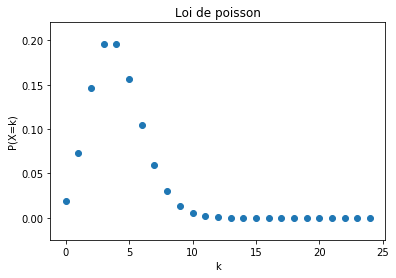

In [42]:
from matplotlib import pyplot as plt
from scipy.stats import poisson

dist = poisson(4)
x = range(0, 25)
plt.scatter(x,dist.pmf(x))

plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.title("Loi de poisson");
plt.show()

### Gaussienne

La distribution gaussienne, également connue sous le nom de distribution normale, est l'une des distributions les plus "polyvalentes" de la théorie des probabilités, et elle apparaît dans une grande variété de contextes.
Par exemple, elle peut être utilisée pour approcher la distribution binomiale lorsque le nombre d'expériences est grand, ou la distribution de Poisson lorsque le taux d'arrivée moyen est élevé.
Elle est également liée à la loi des grands nombres. Pour de nombreux problèmes, nous supposerons souvent que le bruit dans le système est distribué selon une distribution Gaussienne. La liste des applications est infinie.

La distribution gaussienne est déterminée par deux paramètres: la moyenne $\mu$ et la variance $\sigma^2$. La fonction de densité de probabilité est donnée par:

\begin{align}
f(x) = \frac{1}{\sqrt{2\pi}\sigma} e ^{ - \frac{ (x-\mu )^2 }{2\sigma^2} }
\end{align}

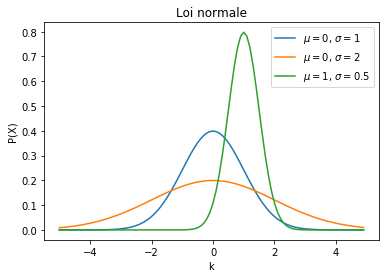

In [52]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

x = np.arange(-5, 5,0.10)

dist1 = norm(0,1)
dist2 = norm(0,2)
dist3 = norm(1,0.5)

g1, = plt.plot(x,dist1.pdf(x), label="$\mu = 0$, $\sigma = 1$")
g2, = plt.plot(x,dist2.pdf(x), label="$\mu = 0$, $\sigma = 2$")
g3, = plt.plot(x,dist3.pdf(x), label="$\mu = 1$, $\sigma = 0.5$")
plt.legend(handles=[g1,g2,g3])
plt.xlabel('k')
plt.ylabel('P(X)')
plt.title("Loi normale");
plt.show()

Pour avoir une meilleure idée de la façon dont la distribution change en fonction de la moyenne et de la variance, nous avons tracé trois distributions gaussiennes différentes.

Nous devons parfois travailler avec des distributions gaussiennes multi-variées. Une distribution gaussienne k-dimensionnelle est paramétrée par $(\mu,\Sigma)$, où $\mu$ est maintenant un vecteur de moyennes dans $\mathbb{R}^k$, et $\Sigma$ est la matrice de covariance dans $\mathbb{R}^{k \times k}$. En d'autres termes, $\Sigma_{ii} = Var(X_i)$, et $\Sigma_{ij} = Cov(X_i,X_j)$. La fonction de densité de probabilité est mainntenant définie selon un vecteur d'entrée :

\begin{align}
f(x) = \frac{1}{\sqrt{2\pi^k |\Sigma|} } e ^ { -\frac{1}{2} (x-\mu)^T \Sigma^-1(x-\mu)  }
\end{align}


## Travailler avec les probabilités

Voici quelques conseils pour manipuler efficacement les distributions.

### L'astuce du $log$

Dans l'apprentissage automatique, nous supposons généralement l'indépendance des différents échantillons.
Par conséquent, nous devons souvent faire face au produit d'un (grand) nombre de distributions.
Lorsque notre objectif est d'optimiser les fonctions de tels produits, il est souvent plus facile de travailler avec le logarithme de telles fonctions.
Comme la fonction logarithmique est une fonction strictement croissante, elle ne modifiera pas la localisation du maximum (bien que la valeur maximale de la fonction avant et après l'application logarithme sera différente).

Supposons que nous voulions maximiser la fonction :

\begin{align}
L(\theta) = \prod_{i=1}^m (h_\theta(x_i))^{y_i} (1 - h_\theta(x_i))^{1 - y_i}
\end{align}

C'est une fonction plutôt complexe. Mais en prenant le logarithme de celui-ci, appelé fonction log-vraisemblance, nous avons alors:

\begin{align}
\ell(\theta) = log(L(\theta)) = \sum_{i=1}^m y_i log(h_\theta(x_i)) + (1 - y_i)log(1 - h_\theta(x_i))
\end{align}

car:

\begin{align}
log(xy)&=log(x)+log(y) \\
log(x^y)&=y log(x)
\end{align}

Ce n'est pas la plus belle fonction du monde, mais au moins c'est plus gérable. Nous pouvons maintenant travailler sur un terme à la fois (c'est-à-dire, un échantillon d'apprentissage) , car ils sont additionnés ensemble plutôt que multipliés ensemble.

